In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('training_set_VU_DM.csv')
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [12]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

# Dealing with nan values

In [13]:
# Inspect which columns have NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)

['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score2', 'srch_query_affinity_score', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'gross_bookings_usd']


In [16]:
missing_df = pd.DataFrame(df.isnull().sum()/len(df))*100
missing_df.reset_index(inplace=True)
missing_df.rename(columns={0: 'percentage', 'index':'column'}, inplace=True)
missing_df = missing_df.sort_values(by = 'percentage', ascending = False)
missing_df

,column,percentage
29,comp1_rate_percent_diff,98.095353
44,comp6_rate_percent_diff,98.060362
27,comp1_rate,97.581250
28,comp1_inv,97.387053
38,comp4_rate_percent_diff,97.356256
52,gross_bookings_usd,97.208949
47,comp7_rate_percent_diff,97.206428
42,comp6_rate,95.156511
4,visitor_hist_starrating,94.920364
5,visitor_hist_adr_usd,94.897735


Impute column prop_review_score

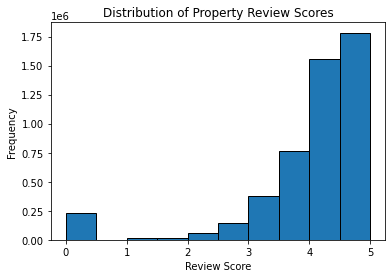

In [18]:
# Plotting a histogram
plt.hist(df['prop_review_score'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Property Review Scores')
plt.show()

In [19]:
# Fill the missing values with the median, as the data is not distributed normally
median = df['prop_review_score'].median()
df['prop_review_score'].fillna(median, inplace=True)

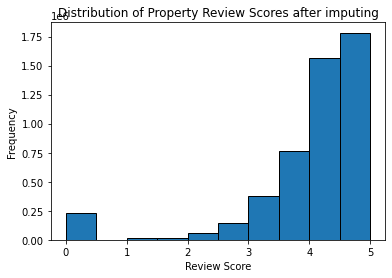

In [23]:
# Again plot the data
# Plotting a histogram
plt.hist(df['prop_review_score'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Property Review Scores after imputing')
plt.show()

Impute column prop_location_score2

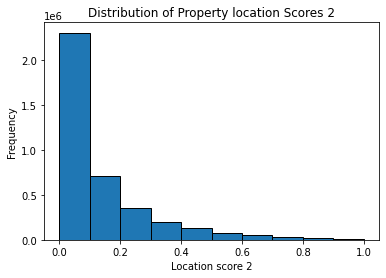

In [22]:
# Plotting a histogram
plt.hist(df['prop_location_score2'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Location score 2')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2')
plt.show()

In [25]:
# Get non-missing values from the column
non_missing_values = df['prop_location_score2'].dropna()

# Calculate the lambda parameter of the exponential distribution
lambda_param = 1 / non_missing_values.mean()

# Generate random values based on the exponential distribution
random_values = np.random.exponential(scale=1/lambda_param, size=df['prop_location_score2'].isna().sum())

# Fill the missing values with the generated random values
df.loc[df['prop_location_score2'].isna(), 'prop_location_score2'] = random_values

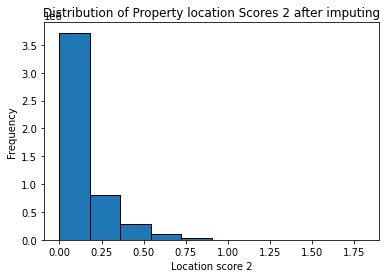

In [26]:
# Plotting a histogram
plt.hist(df['prop_location_score2'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Location score 2')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2 after imputing')
plt.show()

Impute column orig_destination_distance

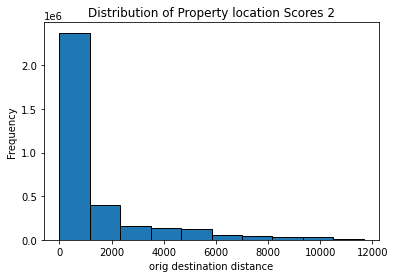

In [27]:
# Plotting a histogram
plt.hist(df['orig_destination_distance'].dropna(), bins=10, edgecolor='k')
plt.xlabel('orig destination distance')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2')
plt.show()

In [29]:
# Get non-missing values from the column
non_missing_values = df['orig_destination_distance'].dropna()

# Reshape the values for input to KDE
values = non_missing_values.values.reshape(-1, 1)

# Create and fit the KDE model
kde = KernelDensity(bandwidth=0.75)  # Adjust the bandwidth as needed
kde.fit(values)

# Generate random values based on the KDE model
random_values = kde.sample(df['orig_destination_distance'].isna().sum()).reshape(-1)

# Fill the missing values with the generated random values
df.loc[df['orig_destination_distance'].isna(), 'orig_destination_distance'] = random_values

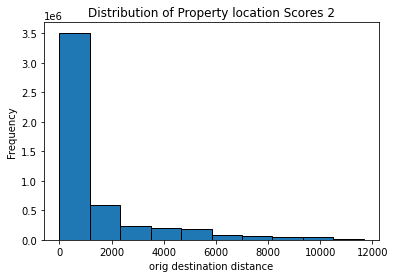

In [30]:
# Plotting a histogram
plt.hist(df['orig_destination_distance'].dropna(), bins=10, edgecolor='k')
plt.xlabel('orig destination distance')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2')
plt.show()

Remove columns that have more that 50% missing values

In [32]:
threshold = len(df) * 0.5  # Set the threshold as 50% of the total rows
df.dropna(thresh=threshold, axis=1, inplace=True)

In [39]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'prop_starrating_location_interaction'],
      dtype='object')

# Creating features

In [56]:
# Encode categorical columns as categories
categorical_cols = ['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'srch_destination_id']
df[categorical_cols] = df[categorical_cols].astype('category')

In [57]:
train_df_2 = df.copy()

In [58]:
cols_to_freq_encode =  ['site_id', 'visitor_location_country_id', 'prop_country_id', 'srch_destination_id']
for col in cols_to_freq_encode:
    freq = train_df_2[col].value_counts(normalize=True)
    freq.to_csv(f'{col}_freq_encodings.csv')
    train_df_2[col] = train_df_2[col].apply(lambda x : round(freq[x]))

### Normalizing columns to reduce the impact of large values on the modeling
- particularly price column since it will vary based on location and to reduce its impact from shadowning other attributes

In [59]:
scaler = MinMaxScaler()
columns_to_normalize = ['price_usd']
train_df_2[columns_to_normalize] = scaler.fit_transform(train_df_2[columns_to_normalize])

### Extracting month from date attribute

In [60]:
train_df_2['date_time'] = pd.to_datetime(train_df_2['date_time'])
train_df_2['month'] = train_df_2['date_time'].dt.month
train_df_2 =  train_df_2.drop('date_time', axis=1)

### Add features

In [71]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,prop_starrating_location_interaction,price_historical_interaction,total_time_duration,highly_rated_prop,month
0,1,0,0,1,893,0.6,3.5,1,0.405444,0.0438,...,1,223.232520,1,0,0,8.49,518.6115,0,0,4
1,1,0,0,1,10404,0.8,4.0,1,0.315186,0.0149,...,1,464.112584,1,0,0,8.80,858.8222,0,1,4
2,1,0,0,1,21315,0.6,4.5,1,0.315186,0.0245,...,1,30.274529,1,0,0,6.60,884.6160,0,0,4
3,1,0,0,1,27348,0.4,4.0,1,0.405444,0.0125,...,1,155.229583,1,0,0,5.66,2646.1603,0,0,4
4,1,0,0,1,29604,0.8,3.5,1,0.378223,0.1241,...,1,130.755887,1,0,0,10.56,707.8494,0,1,4


Add a column with an interaction between prop-starrating and prop_location_score1 to represent the overall desirability of a hotel based on star rating and location score

In [72]:
# Create a new feature by multiplying 'prop_starrating' and 'prop_location_score1'
train_df_2['prop_starrating_location_interaction'] = train_df_2['prop_starrating'] * train_df_2['prop_location_score1']

In [73]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,prop_starrating_location_interaction,price_historical_interaction,total_time_duration,highly_rated_prop,month
0,1,0,0,1,893,0.6,3.5,1,0.405444,0.0438,...,1,223.232520,1,0,0,0.243266,518.6115,0,0,4
1,1,0,0,1,10404,0.8,4.0,1,0.315186,0.0149,...,1,464.112584,1,0,0,0.252149,858.8222,0,1,4
2,1,0,0,1,21315,0.6,4.5,1,0.315186,0.0245,...,1,30.274529,1,0,0,0.189112,884.6160,0,0,4
3,1,0,0,1,27348,0.4,4.0,1,0.405444,0.0125,...,1,155.229583,1,0,0,0.162178,2646.1603,0,0,4
4,1,0,0,1,29604,0.8,3.5,1,0.378223,0.1241,...,1,130.755887,1,0,0,0.302579,707.8494,0,1,4


In [74]:
# Create a new feature interaction between price_usd and prop_log_historical_price to capture the 
# relative price compared to historical prices 
train_df_2['price_historical_interaction'] = train_df_2['price_usd'] * train_df_2['prop_log_historical_price']

In [75]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,prop_starrating_location_interaction,price_historical_interaction,total_time_duration,highly_rated_prop,month
0,1,0,0,1,893,0.6,3.5,1,0.405444,0.0438,...,1,223.232520,1,0,0,0.243266,0.000004,0,0,4
1,1,0,0,1,10404,0.8,4.0,1,0.315186,0.0149,...,1,464.112584,1,0,0,0.252149,0.000007,0,1,4
2,1,0,0,1,21315,0.6,4.5,1,0.315186,0.0245,...,1,30.274529,1,0,0,0.189112,0.000007,0,0,4
3,1,0,0,1,27348,0.4,4.0,1,0.405444,0.0125,...,1,155.229583,1,0,0,0.162178,0.000022,0,0,4
4,1,0,0,1,29604,0.8,3.5,1,0.378223,0.1241,...,1,130.755887,1,0,0,0.302579,0.000006,0,1,4


In [76]:
train_df_2.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'prop_starrating_location_interaction',
       'price_historical_interaction', 'total_time_duration',
       'highly_rated_prop', 'month'],
      dtype='object')

In [77]:
# Create a new feature interaction between srch_length_of_stay and srch_booking_window to represent
# the total duration of the stay and planning horizon
train_df_2['total_time_duration'] = train_df_2['srch_length_of_stay'] * train_df_2['srch_booking_window']

In [78]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,prop_starrating_location_interaction,price_historical_interaction,total_time_duration,highly_rated_prop,month
0,1,0,0,1,893,0.6,3.5,1,0.405444,0.0438,...,1,223.232520,1,0,0,0.243266,0.000004,0.0,0,4
1,1,0,0,1,10404,0.8,4.0,1,0.315186,0.0149,...,1,464.112584,1,0,0,0.252149,0.000007,0.0,1,4
2,1,0,0,1,21315,0.6,4.5,1,0.315186,0.0245,...,1,30.274529,1,0,0,0.189112,0.000007,0.0,0,4
3,1,0,0,1,27348,0.4,4.0,1,0.405444,0.0125,...,1,155.229583,1,0,0,0.162178,0.000022,0.0,0,4
4,1,0,0,1,29604,0.8,3.5,1,0.378223,0.1241,...,1,130.755887,1,0,0,0.302579,0.000006,0.0,1,4


In [79]:
# Create a new column 'highly_rated_prop' based on 'prop_starrating'
train_df_2['highly_rated_prop'] = train_df_2['prop_starrating'].apply(lambda x: 1 if x >= 4 else 0)

In [80]:
# Add a categorical value which depicts the season a property was searched for
train_df_2['season'] = train_df_2['month'].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0})

Perform min-max scaling

In [81]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,prop_starrating_location_interaction,price_historical_interaction,total_time_duration,highly_rated_prop
0,1,2013-04-04 08:32:15,12,187,219,893,0.6,3.5,1,0.405444,...,0.0,1,223.232520,1,0,0,0.243266,0.000004,0.0,0
1,1,2013-04-04 08:32:15,12,187,219,10404,0.8,4.0,1,0.315186,...,0.0,1,464.112584,1,0,0,0.252149,0.000007,0.0,0
2,1,2013-04-04 08:32:15,12,187,219,21315,0.6,4.5,1,0.315186,...,0.0,1,30.274529,1,0,0,0.189112,0.000007,0.0,0
3,1,2013-04-04 08:32:15,12,187,219,27348,0.4,4.0,1,0.405444,...,0.0,1,155.229583,1,0,0,0.162178,0.000022,0.0,0
4,1,2013-04-04 08:32:15,12,187,219,29604,0.8,3.5,1,0.378223,...,0.0,1,130.755887,1,0,0,0.302579,0.000006,0.0,0


In [82]:
df.to_csv('training_freek_feateng.csv', index=False)